\newpage

## Question

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn import metrics

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
import matplotlib.cm as cm
from sklearn.metrics import adjusted_rand_score

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
import matplotlib.pyplot as plt

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

ConnectionError: Error connecting to server

In [16]:
all = heart_disease.data.original
all.dtypes

NameError: name 'heart_disease' is not defined

In [17]:
all

<function all(iterable, /)>

Q1

Our target variable is ‘num’, which is the diagnosis of heart disease. We need to build a classification model to predict the diagnosis of heart disease.

Q2

In [75]:
all=all.copy()
all_cate1=all[['sex','cp','fbs','restecg','exang','slope','thal']]
all_cate = pd.get_dummies(all_cate1, columns=all_cate1.columns, drop_first=False)
all_num = all[['age','trestbps','chol','thalach','oldpeak','ca']]
scale = StandardScaler()
all_std = pd.DataFrame(
    scale.fit_transform(all_num), columns=all_num.columns
    ) 
all_transed=pd.concat([all_cate,all_std], axis = 1)
#GitHub Copilot is used in this question.

In [76]:
all_std

,age,trestbps,chol,thalach,oldpeak,ca
0,0.948726,0.757525,-0.264900,0.017197,1.087338,-0.718306
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2.487269
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1.418744
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,-0.718306
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,-0.718306
...,...,...,...,...,...,...
298,-1.046013,-1.234430,0.334813,-0.770990,0.138373,-0.718306
299,1.502821,0.700612,-1.038723,-0.376896,2.036303,1.418744
300,0.283813,-0.096170,-2.238149,-1.515388,0.138373,0.350219
301,0.283813,-0.096170,-0.206864,1.068113,-0.896862,0.350219


In [77]:
all_cate

,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False
1,False,True,False,False,False,True,True,False,False,False,True,False,True,False,True,False,True,False,False
2,False,True,False,False,False,True,True,False,False,False,True,False,True,False,True,False,False,False,True
3,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,True,True,False,False
4,True,False,False,True,False,False,True,False,False,False,True,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True
299,False,True,False,False,False,True,False,True,True,False,False,True,False,False,True,False,False,False,True
300,False,True,False,False,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
301,True,False,False,True,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False


Q3

In [78]:
print(heart_disease.variables)
all.shape

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

(303, 14)

There are 13 features and 303 observations in the dataset. For the predictor variables, 'sex','cp','fbs','restecg','exang','slope','thal' are categorical variables, 'age','trestbps','chol','thalach','oldpeak','ca' are numerical variables. And there are some missing value in the dataset. 

Q4

In [79]:
all_transed['num'] = all['num'].apply(lambda i: 1 if i > 0 else 0)
all_transed['num'] = pd.Categorical(all_transed['num'])

Q5

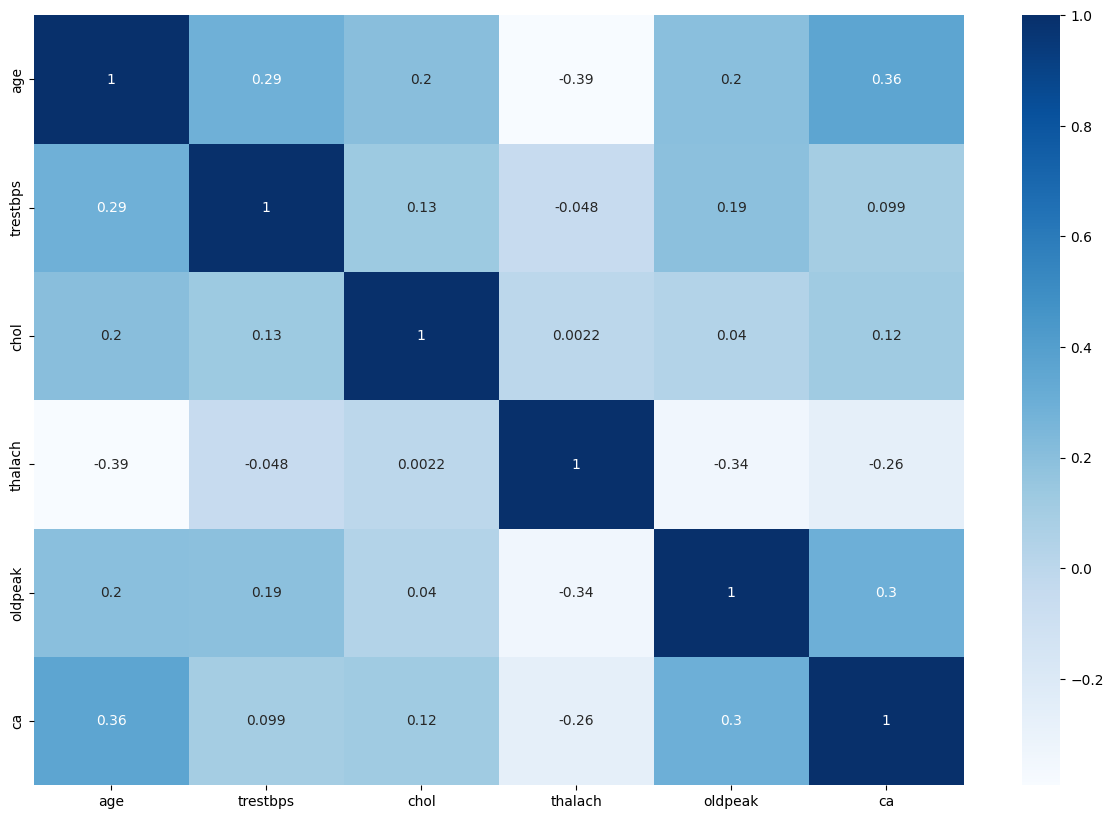

In [97]:
plt.figure(figsize=(15, 10))
sns.heatmap(all_std.corr(),
annot=True,
cmap='Blues')
plt.show()

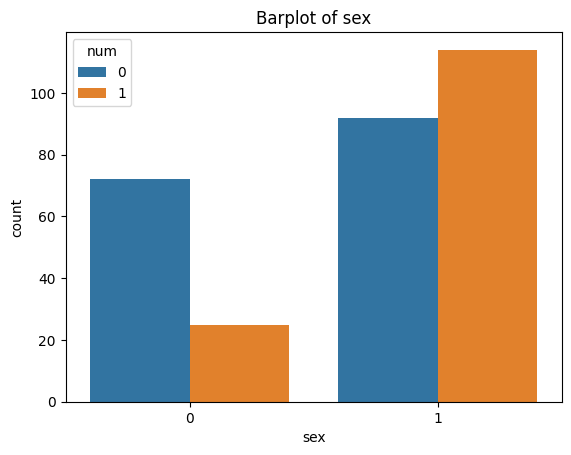

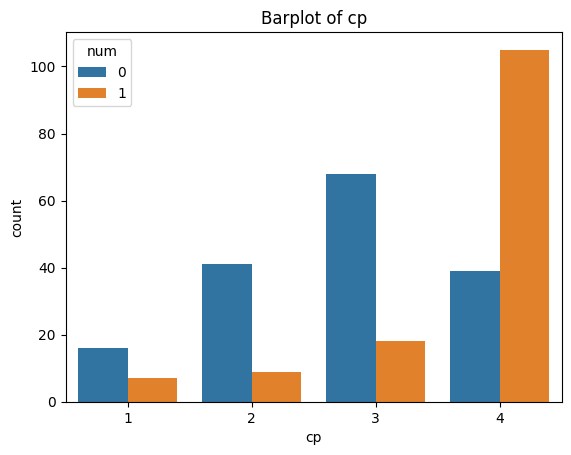

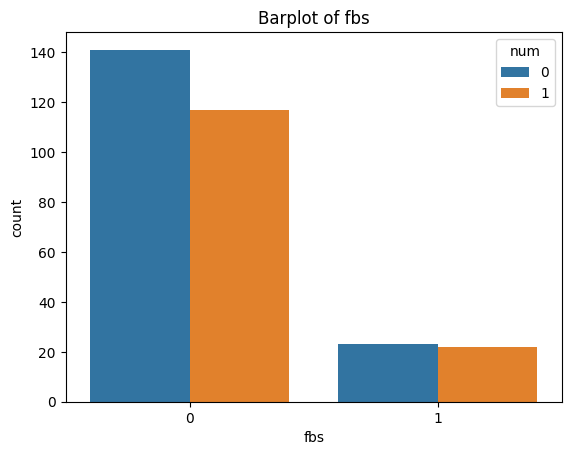

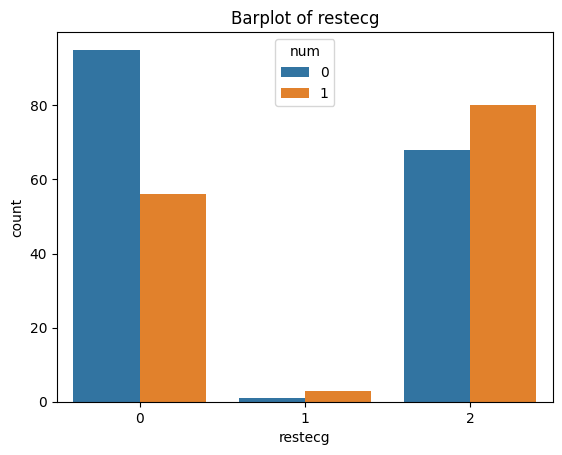

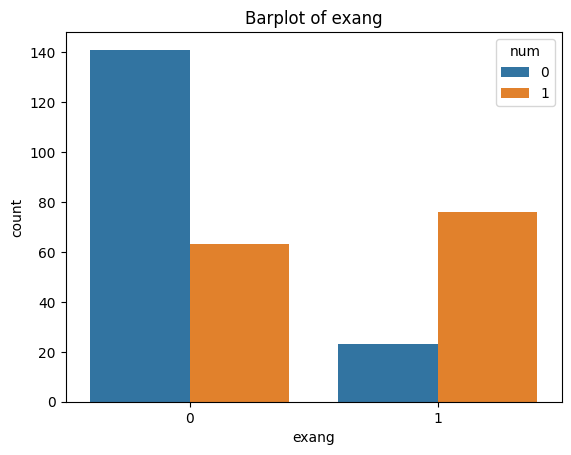

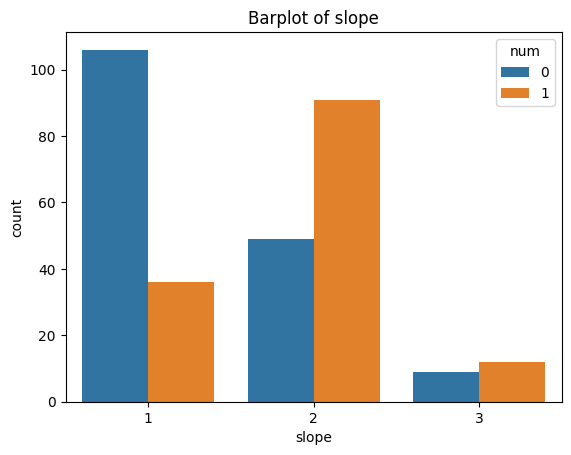

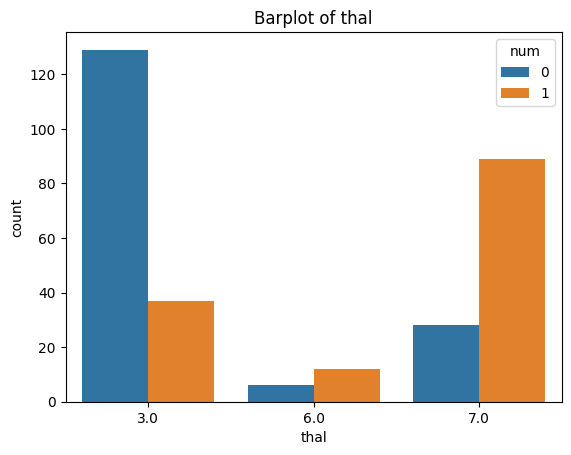

In [ ]:
for column in all_cate1.columns:
  plt.figure()
  sns.countplot(x=column, hue=all_transed['num'],data=all_cate1)
  plt.title(f'Barplot of {column}')
  plt.show()

Thus, we apply heatmap to analyze the relationship between numerical variables. First of all, we can tell for all positive relative variables, they are not actually connected closely since the biggest correlation is ca vs. age, which the ratio is 0.36. Second of all, the situation is similar for negative correlated variables, the biggest correlation is age vs. thalach, which is -0.39. Therefore, we can conclude there is no strong relationship between each numerical variable.

Second of all, we apply bar plot to analyze the categorical variables relations correlated to the diagnosis of heart diseases. First of all, from the sex data, we can tell that male testers have higher risk of getting heart attack. Second, from the chest pain type, we can tell testers who have asymptomatic have the highest risk of getting heart attack. Thirdly, we can tell fasting blood sugar actually don’t affect the risk of getting heart disease. Next, by the resting electrocardiographic results, we can tell normal testers have lower probability of getting heart disease compared to who showing probable or definite left ventricular hypertrophy by Estes' criteria. In addition, testers who exercise induced angina have higher risk getting heart attack. Furthermore, from the slope data set, we can tell that having upsloping during peak exercise ST segment have a lower risk of getting heart attack compared to flat or down sloping. Lastly, testers with higher thal index have higher risk of having heart disease.


Q6

In [82]:
all_transed=all_transed.dropna()
all_transed.shape
all_std=all_std.dropna()

There are 299 observations after dropping the missing value.

Q7

In [83]:
#k-means
k_m = KMeans(n_clusters=2, n_init=20, random_state=0)
k_m.fit(all_std)
k_m.labels_


array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0], dtyp

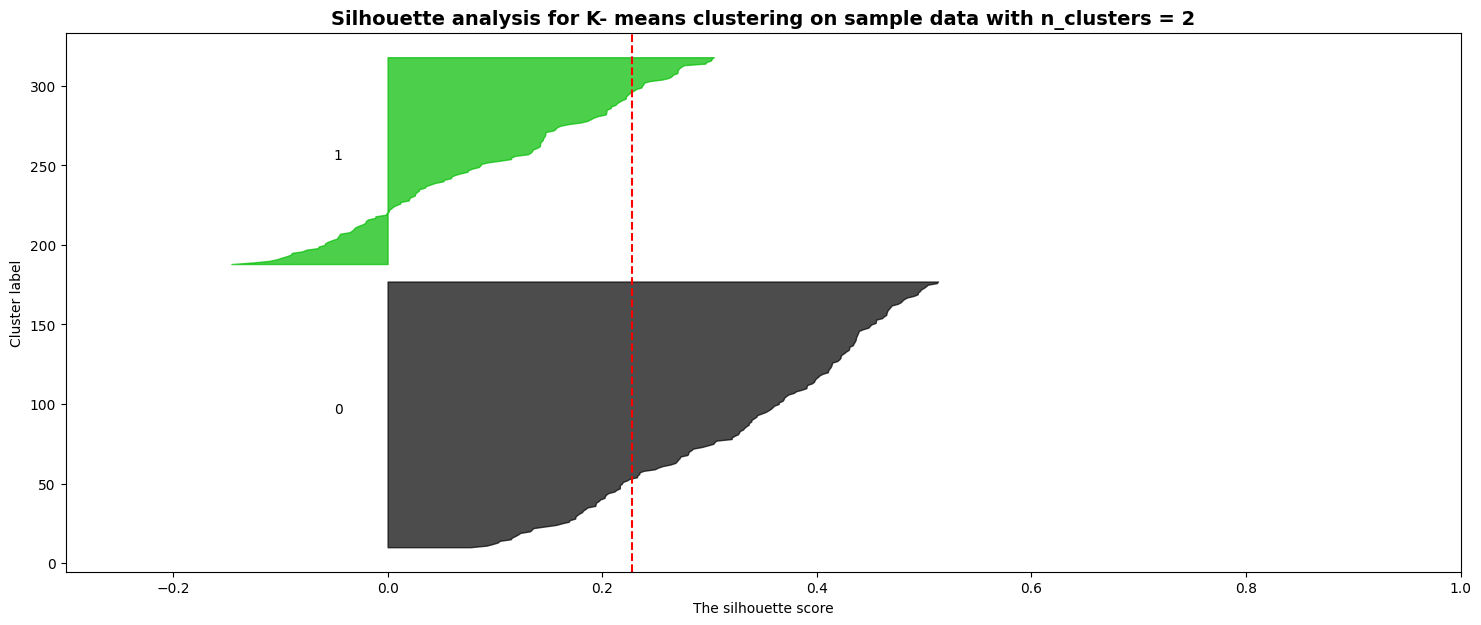

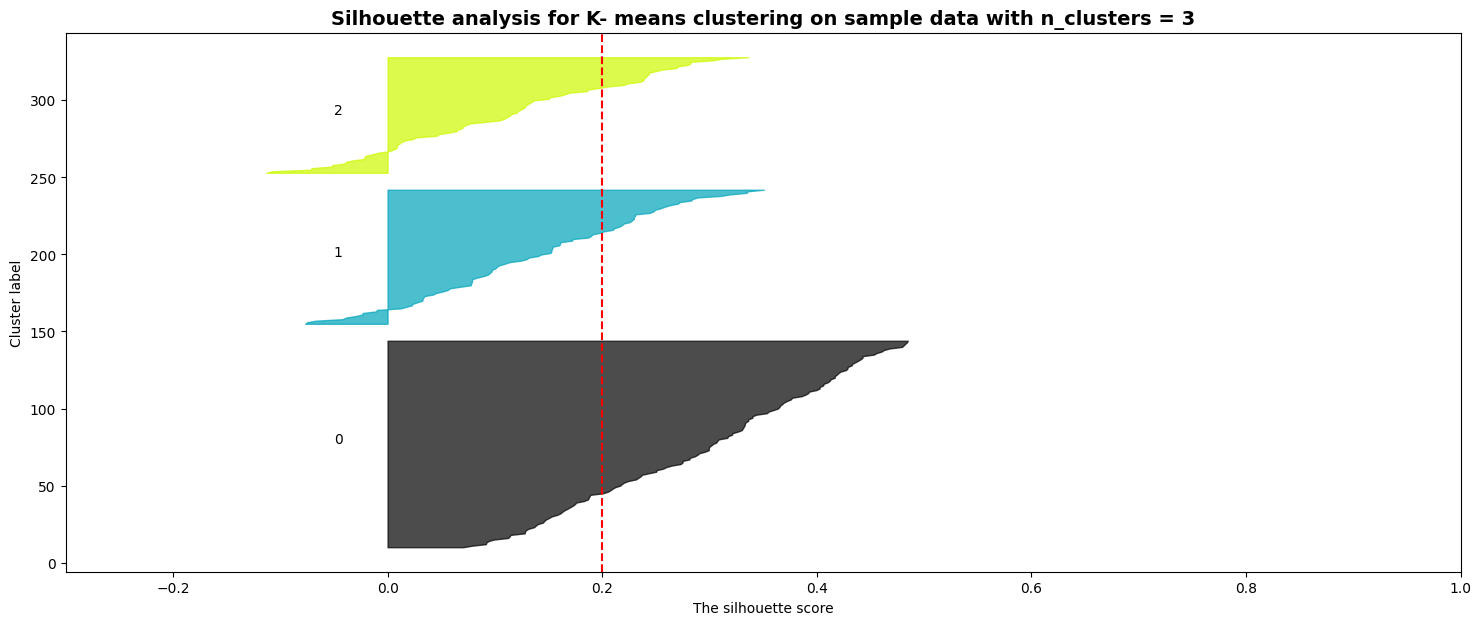

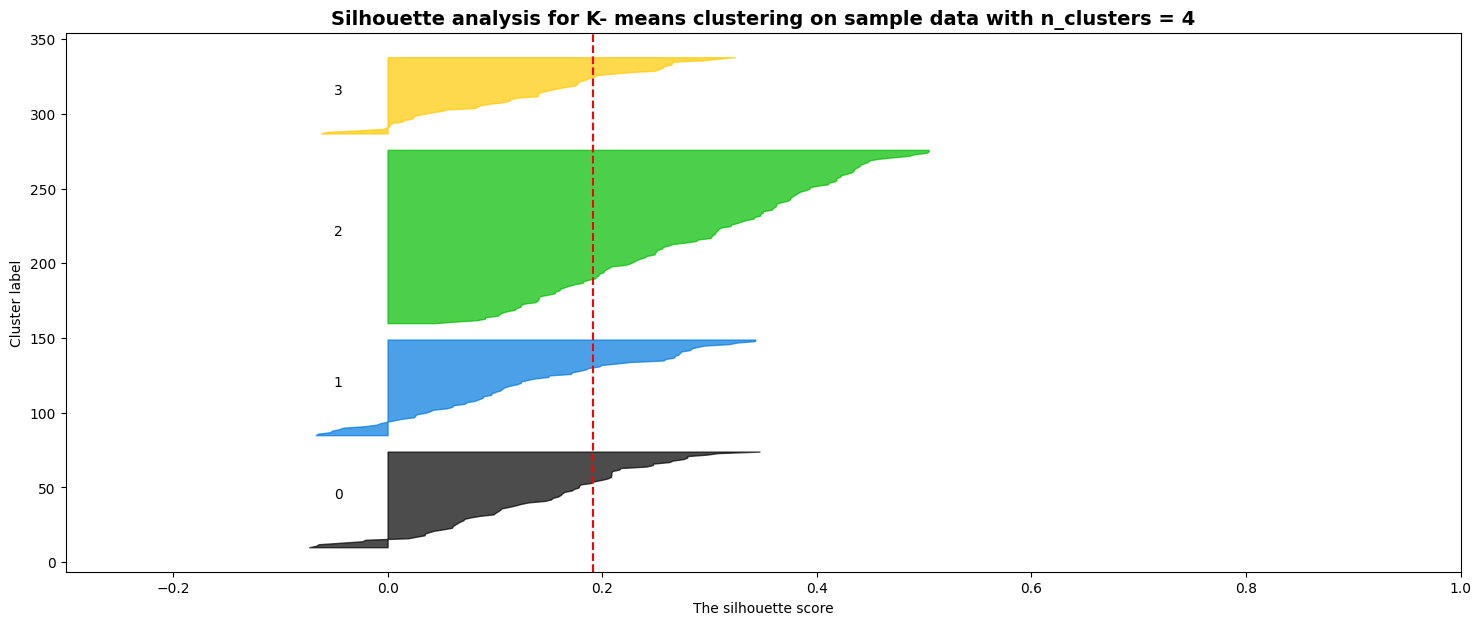

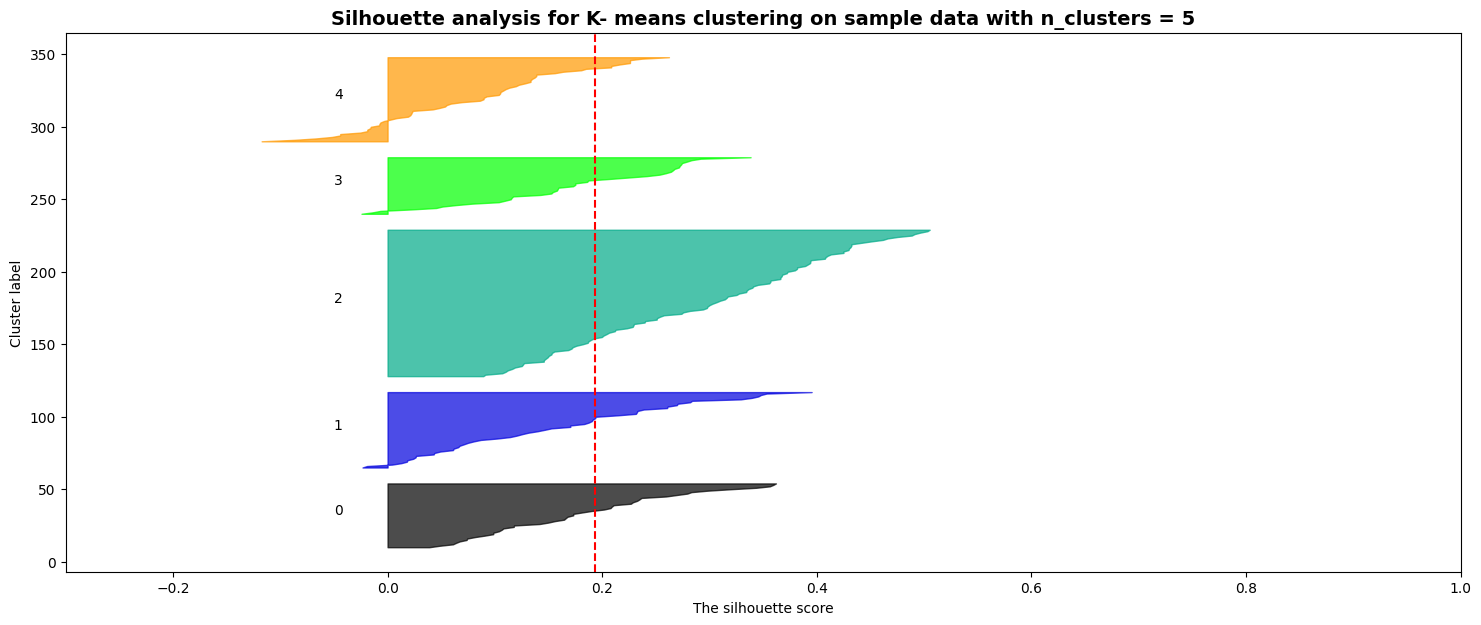

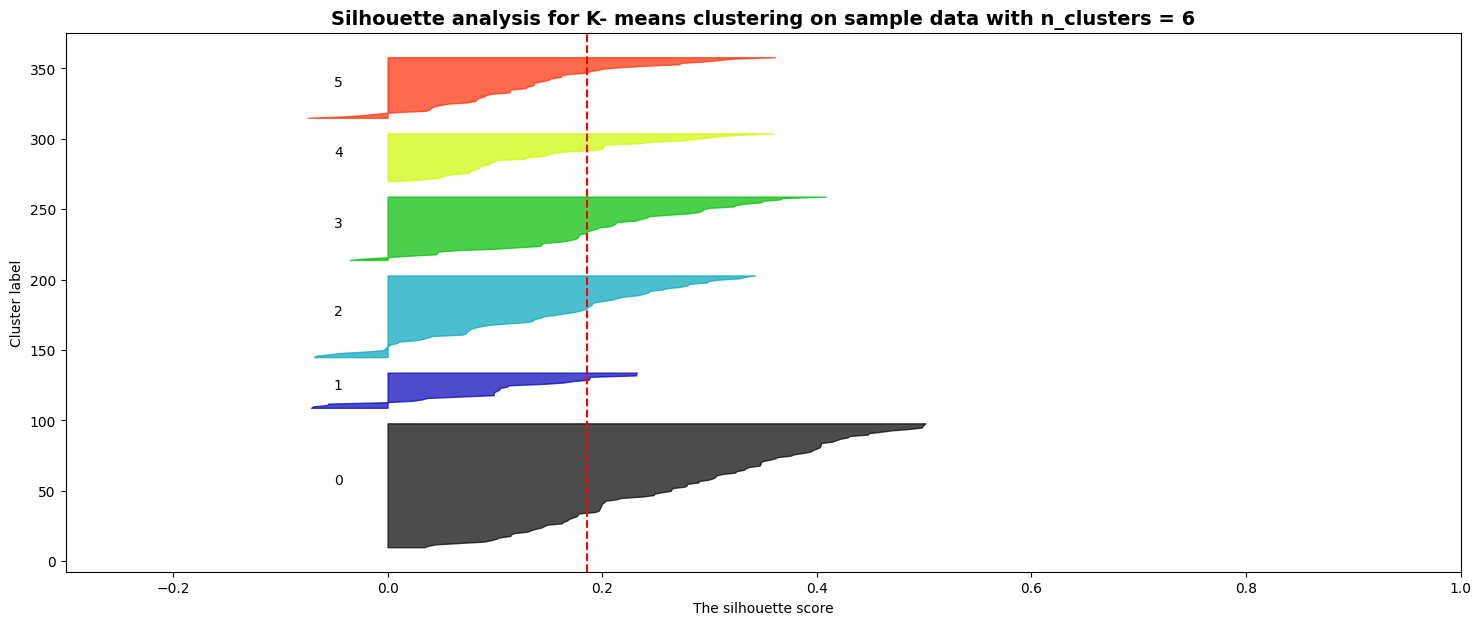

In [98]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km= KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(all_std)
    silhouette_avg_km = silhouette_score(all_std, cluster_labels_km)
    sample_silhouette_values = silhouette_samples(all_std, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
          y=np.arange(y_lower, y_upper), x1=0,
          x2=ith_cluster_silhouette_values,
          facecolor=color,
          edgecolor=color,
          alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette score")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
      "Silhouette analysis for K- means clustering on sample data with n_clusters = %d"% n_clusters,
     fontsize=14,
     fontweight="bold",
 )
    
plt.show() 

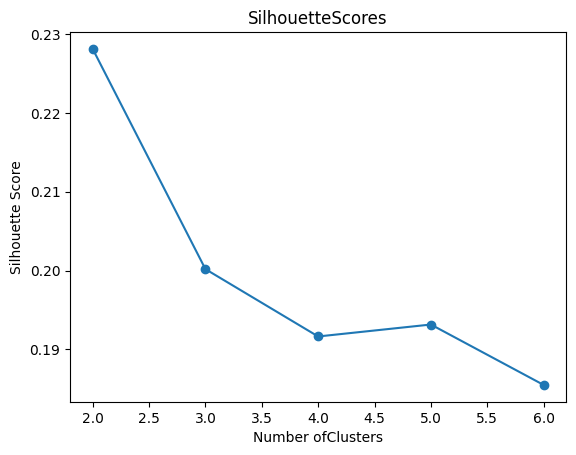

In [85]:
k_values= range(2,7)
silhouette_scores =[]
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init = 20,random_state = 0)
    kmeans.fit(all_std)
    silhouette_avg= silhouette_score(all_std,kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
plt.plot(k_values,silhouette_scores,marker='o')
plt.xlabel('Number ofClusters')
plt.ylabel('Silhouette Score')
plt.title('SilhouetteScores')
plt.show()

In [86]:
X = pd.DataFrame(all_std, index=all_std.index, columns=all_std.columns)

pca_X = PCA()

pca_X.fit(X)

pca_loadings = pd.DataFrame(pca_X.fit(X).components_.T, index=all_std.columns, 
                            columns=['PC1', 'PC2','PC3', 'PC4','PC5','PC6',])

pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
age,0.516919,0.148346,-0.097963,-0.537842,0.041099,0.640491
trestbps,0.308054,0.490415,0.734000,-0.089893,0.089841,-0.331192
chol,0.202494,0.680514,-0.514362,0.303832,-0.352333,-0.121967
thalach,-0.453794,0.429759,0.108339,0.304349,0.498074,0.506887
oldpeak,0.429363,-0.277230,0.278984,0.695589,-0.220274,0.358600
ca,0.454547,-0.113306,-0.312265,0.184008,0.754654,-0.282274


In [87]:
pc_scores =pd.DataFrame(pca_X.fit_transform(X),
                         
columns=['PC1','PC2', 'PC3', 'PC4','PC5','PC6'],
index=X.index)

pc_scores.head(6)

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.789767,0.117909,1.132289,-0.032592,-0.565607,0.983170
1,3.484839,0.337826,-0.204686,-0.486166,0.823169,-1.225264
2,2.064728,-1.275841,-0.610433,0.126780,0.449767,0.771218
3,-1.186743,-0.095100,1.083118,2.906943,-0.297669,0.572828
4,-1.617602,-0.414957,0.920838,0.938077,0.106004,-0.017316
5,-1.149774,0.230214,-0.094109,0.003195,0.149951,1.107903


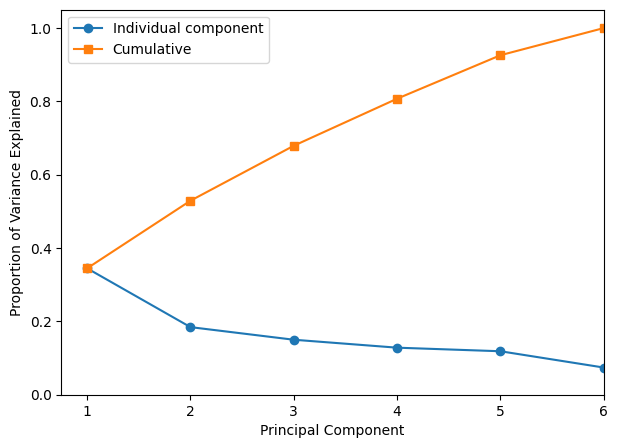

In [88]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5,6], pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6], np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')

plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2)
plt.show()

In [89]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)
labels = kmeans.labels_

In [90]:
sil_score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.2972249641035739


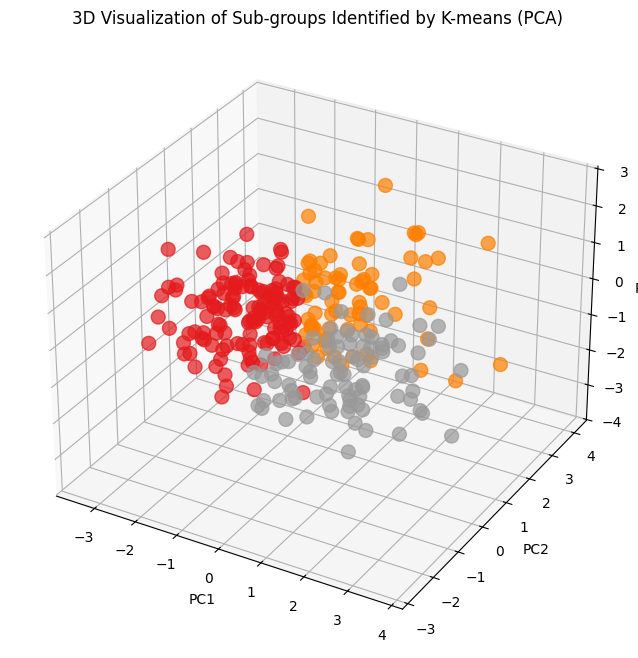

In [91]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Set1', s=100, alpha=0.7)
ax.set_title('3D Visualization of Sub-groups Identified by K-means (PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


These part used Github helping for 3 dimensional plot.

At the beginning I used all the features for k-means clustering and computed designated Silhouette Score. The result was really bad, the highest is only 0.22. Thus, I decided to use PCA to reduce the dimensions. By the elbow rule, I chose 3 main principal components. And, then I used the dimensionality-reduced data for k-means clustering again. This time, the Silhouette Score improved to 0.29, which is better than the previous result.

Q8

In [92]:
X = all_transed.drop(['num'], axis=1)
y = all_transed['num']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

Q9

We are doing the classification model, so we may try to use the KNN and logistic regression model. Both models are well suited for binary classification tasks and are widely used in classification problems. And logistic regression is the linear, and KNN is non-linear, so we will use two different types of classifier.

Q10

We can use accuracy and AUC-ROC to compare classifier performance. Accuracy is a good general metric when the dataset is balanced. AUC-ROC is a good general metric for binary outcome when the dataset is imbalanced.

Q11

In [93]:
k_range = range(1, 10)
scores = [] 

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred),2))

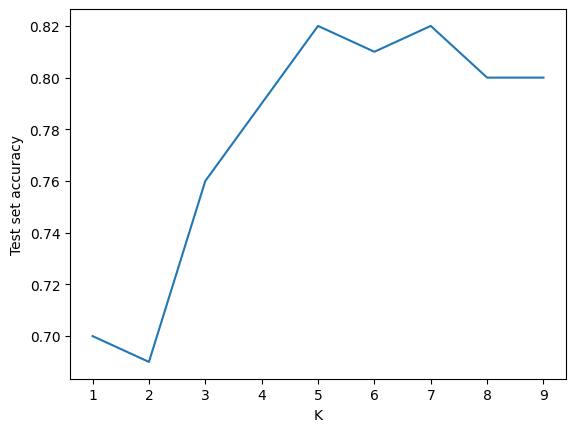

In [94]:
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Test set accuracy')
plt.xticks(range(1,10))
plt.show()

Let's choose k=5 because the modle performs the best on the test set when k=5.

In [95]:
log = LogisticRegression(max_iter=100)
log.fit(X_train, y_train)

LogisticRegression()

We choose the maximum number of iterations taken for the solvers to converge to 100.

Q12

In [1]:
lasso_cv = LogisticRegressionCV(
    penalty='l1',
    solver='saga',
    cv=5,
    max_iter=10000,
    scoring='accuracy'
)
lasso_cv.fit(X_train, y_train)
print(1/lasso_cv.C_[0])

m_lasso = LogisticRegression(
    penalty='l1',
    C=lasso_cv.C_[0],
    solver='saga',
    max_iter=10000
)
m_lasso.fit(X_train, y_train) 

NameError: name 'LogisticRegressionCV' is not defined

Q13

In [ ]:
y_prob = knn.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy = metrics.accuracy_score(y_test, y_pred)
auc_roc = metrics.roc_auc_score(y_test, y_prob)

print(f"KNN Accuracy: {accuracy:.4f}")
print(f"KNN AUC-ROC: {auc_roc:.4f}")


In [ ]:
y_pred_log = log.predict(X_test)
y_prob_log = log.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_log)
auc_roc = roc_auc_score(y_test, y_prob_log)


print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Logistic Regression AUC-ROC: {auc_roc:.4f}")

In [ ]:

m_lasso_prob = m_lasso.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, m_lasso_prob)
auc_score = roc_auc_score(y_test, m_lasso_prob)
print(f"Lasso Model AUC Score: {auc_score:.4f}")
m_lasso_pre = m_lasso.predict(X_test)
accuracy_lasso=accuracy_score(y_test, m_lasso_pre)
print(f"Lasso Model Accuracy: {accuracy_lasso:.4f}")

The lasso model logistic regression performs best in both accuracy and AUC-ROC, and the logistic regression performs better than the KNN model. The accuracys of three models are all above 0.8, and Auc-Roc score are all higher than 0.9, and it shows that the models are good fit for the test data. However, the lasso logistic regression model only has slightly increase in accuracys and AUC-ROC socre, whish means that the feature selection does not has significant impact on the model improvement.

Q14

In [ ]:
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': m_lasso.coef_.reshape(len(X_train.columns))})
coefficients_df

16. **Team Contributions:** 

Question 1,2,3,4,6,8,9,10 and 11 are done by Hongrui Chen(400313212). 
Quesntion 5, 7, 16 and 17 are done by Fengshuo Liu(400400809). 
Question 12,13 and 14 done by Chenxi Jiang(400376607).

17. **Link** to the public GitHub repository. 

https://github.com/martin070904/clus-mar117.git

\newpage

## References

Python Data Science Handbook by Jake VanderPlas (O'Reilly Media, Inc., Published on Nov 21, 2016)

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.